Les libraries utiles

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

IMPORTATION DES DONNEES

In [103]:
train_data1 = pd.read_csv("train.csv")
train_data1.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


DIMENSION

In [104]:
train_data1.shape

(165034, 14)

VERIFICATION DES DOUBLONS

In [105]:
print("id :" ,train_data1['id'].duplicated())
print("CustomerId :" ,train_data1['CustomerId'].duplicated())

id : 0         False
1         False
2         False
3         False
4         False
          ...  
165029    False
165030    False
165031    False
165032    False
165033    False
Name: id, Length: 165034, dtype: bool
CustomerId : 0         False
1         False
2         False
3         False
4         False
          ...  
165029     True
165030     True
165031     True
165032     True
165033     True
Name: CustomerId, Length: 165034, dtype: bool


Suppression des colnnes non utiles

In [106]:
drop_cols = ["id", "CustomerId", "Surname"]
train_data=train_data1.drop(columns=drop_cols)

Vérification des données manquants dans la base

In [107]:
train_data.isna().sum()/len(train_data)

CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

Type des différentes variables et leur distribution suivant le types

In [108]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


In [109]:

# Colonnes catégorielles
categorical_cols = list(train_data.select_dtypes(include="object").columns)
categorical_cols = [col for col in categorical_cols if col != "Exited"]

# Colonnes numériques
numeric_cols = list(train_data.select_dtypes(include=["int64", "float64"]).columns)
numeric_cols = [col for col in numeric_cols if col != "Exited"]



In [110]:
print("Categorical columns:", categorical_cols)
print("Numeric columns:", numeric_cols)
print("variable cible:", Y.head())

Categorical columns: ['Geography', 'Gender']
Numeric columns: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
variable cible: 0    0
1    0
2    0
3    0
4    0
Name: Exited, dtype: int64


In [111]:
print( "Gender :",train_data['Gender'].unique())
print( "Geography :",train_data['Geography'].unique())
print( "HasCrCard :",train_data['HasCrCard'].unique())
print( "IsActiveMember :",train_data['IsActiveMember'].unique())
print( "Exited :",train_data['Exited'].unique())

Gender : ['Male' 'Female']
Geography : ['France' 'Spain' 'Germany']
HasCrCard : [1. 0.]
IsActiveMember : [0. 1.]
Exited : [0 1]


In [112]:
from sklearn.model_selection import train_test_split
# Construction de X
X = train_data[numeric_cols + categorical_cols]

# Variable cible
Y = train_data["Exited"]

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(132027, 10) (33007, 10) (132027,) (33007,)


Analyse univariée

VARIABLE NUMÉRIQUE : CreditScore


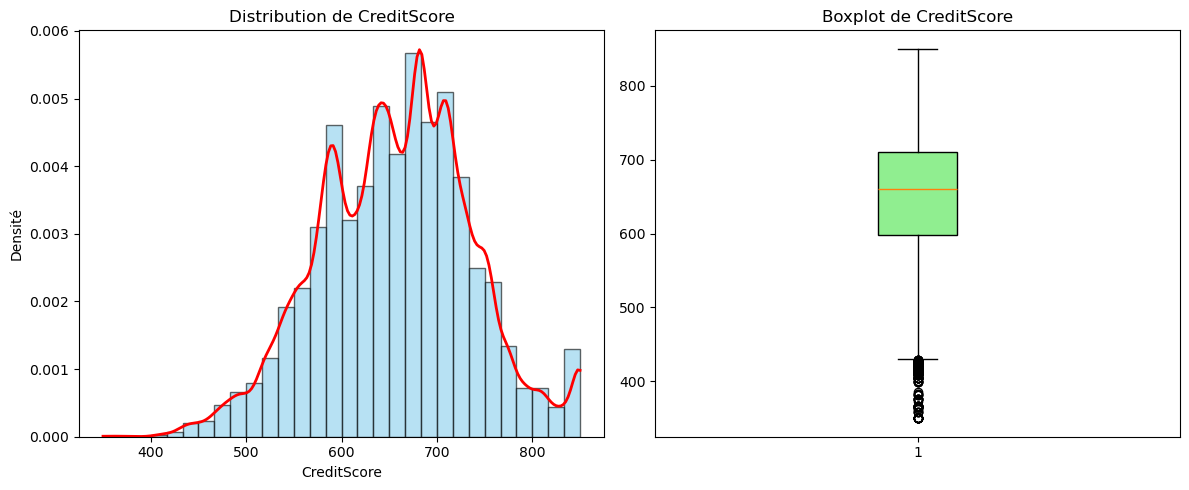

VARIABLE NUMÉRIQUE : Age


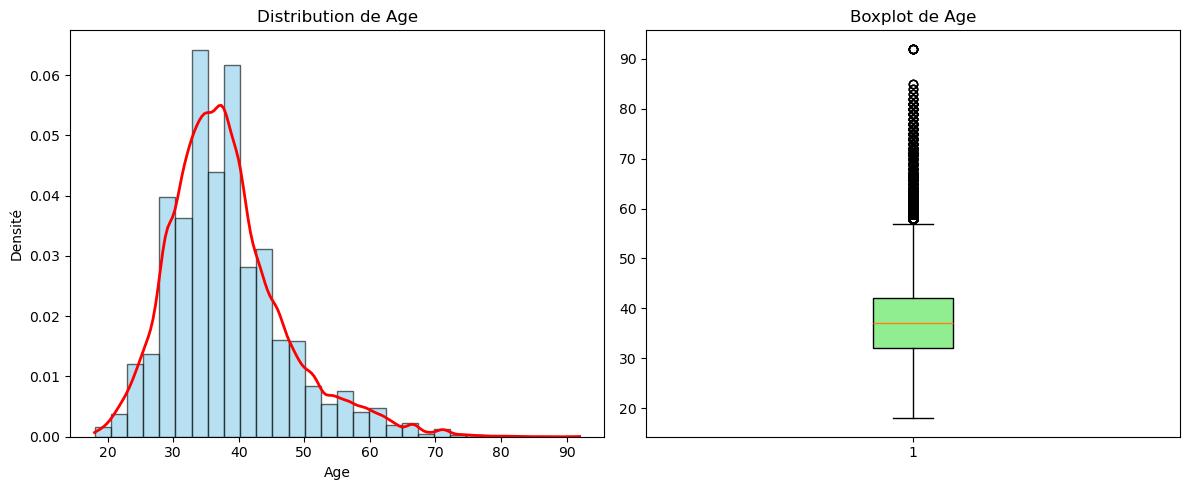

VARIABLE NUMÉRIQUE : Tenure


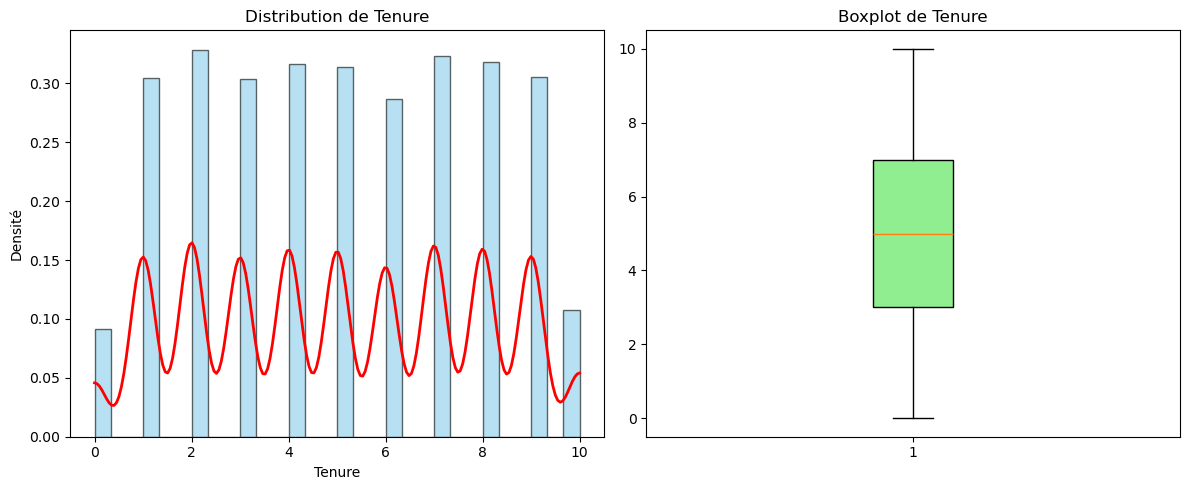

VARIABLE NUMÉRIQUE : Balance


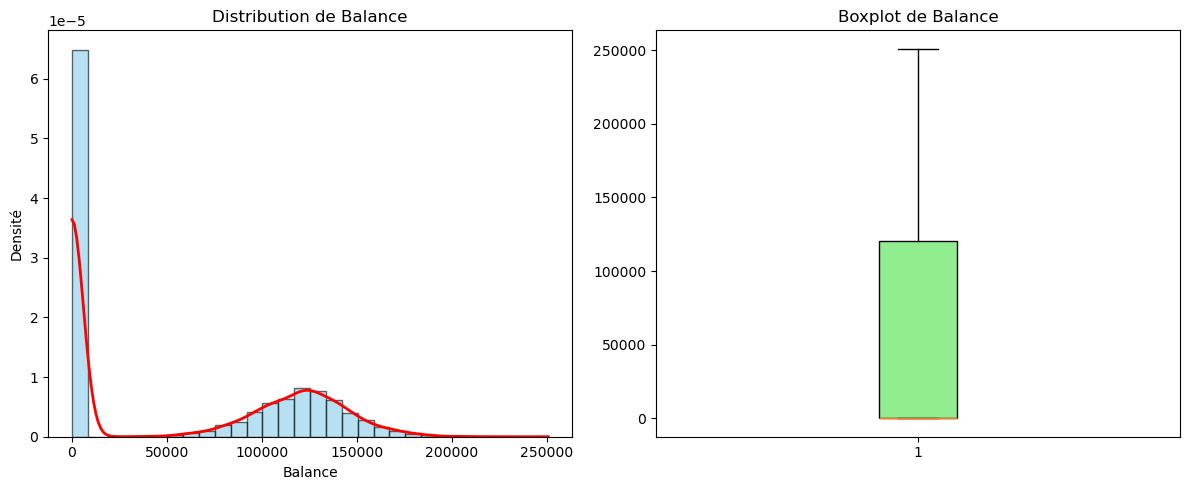

VARIABLE NUMÉRIQUE : NumOfProducts


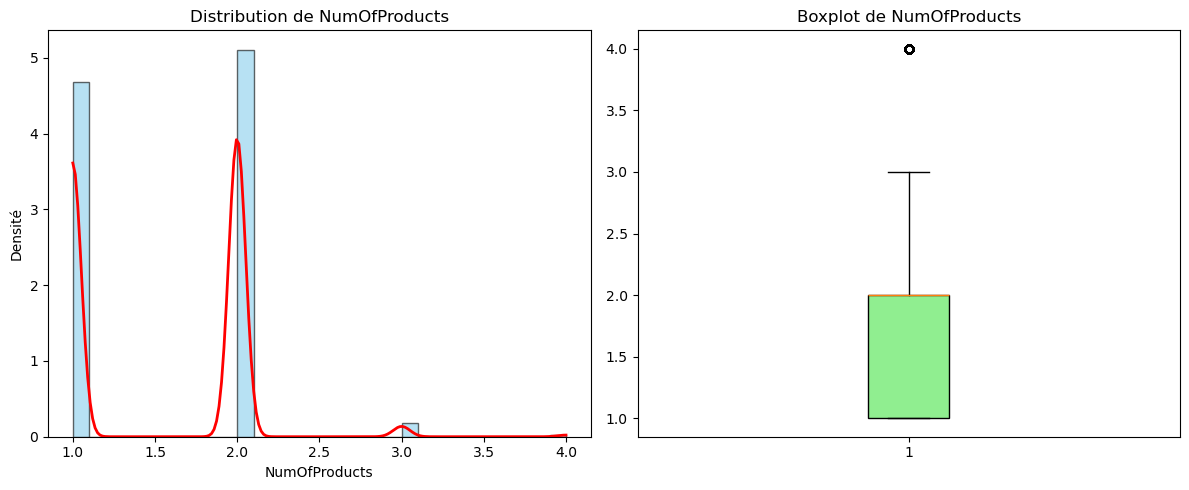

VARIABLE NUMÉRIQUE : HasCrCard


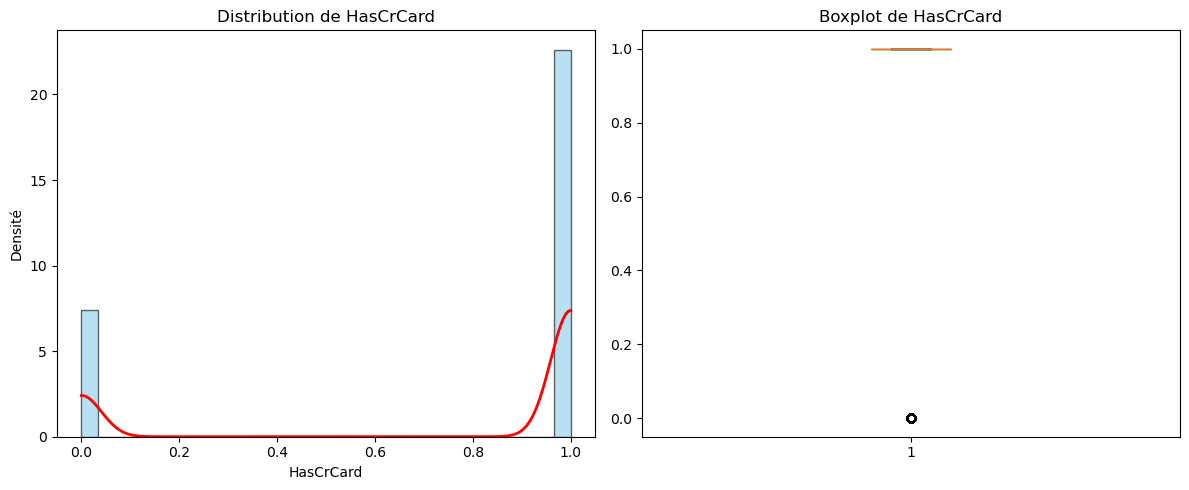

VARIABLE NUMÉRIQUE : IsActiveMember


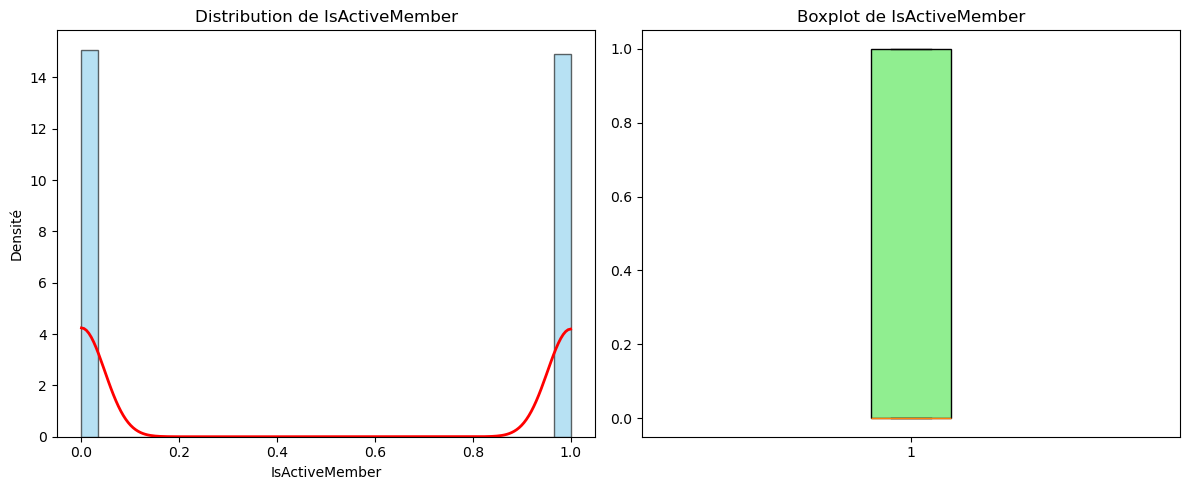

VARIABLE NUMÉRIQUE : EstimatedSalary


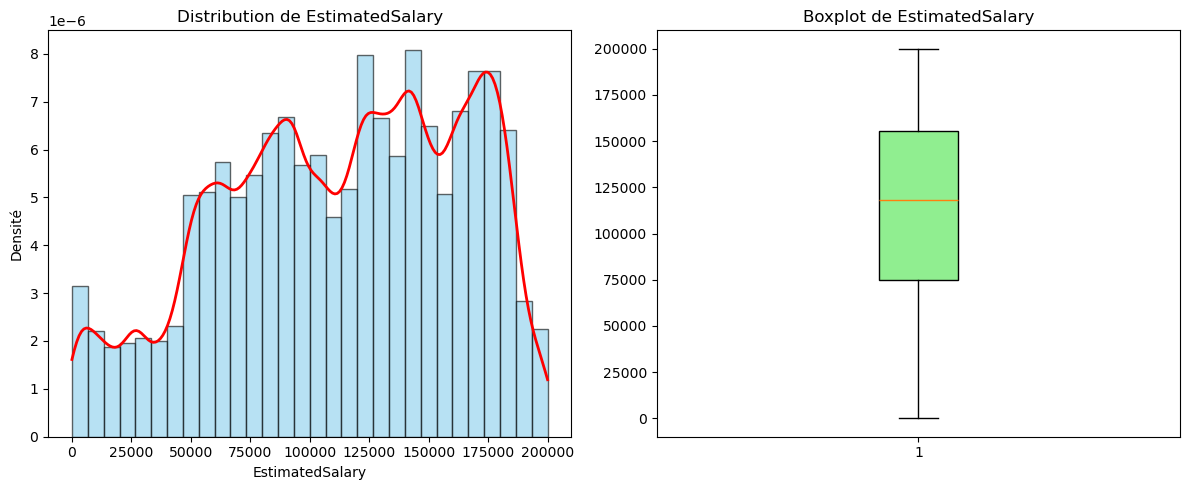

In [113]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

for col in numeric_cols:
    print("="*70)
    print(f"VARIABLE NUMÉRIQUE : {col}")
    
    # Préparation des données depuis X_train
    data = X_train[col]
    
    # Création de la figure avec 2 sous-graphiques côte à côte
    fig, axes = plt.subplots(1, 2, figsize=(12,5))
    
    # ---- À gauche : Histogramme + densité ----
    axes[0].hist(data, bins=30, density=True, alpha=0.6,
                 color='skyblue', edgecolor='black')
    
    if data.shape[0] > 1:
        density = gaussian_kde(data)
        x = np.linspace(data.min(), data.max(), 200)
        axes[0].plot(x, density(x), color='red', linewidth=2)
    
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Densité")
    axes[0].set_title(f"Distribution de {col}")
    
    # ---- À droite : Boxplot ----
    axes[1].boxplot(data, vert=True, patch_artist=True,
                    boxprops=dict(facecolor="lightgreen"))
    axes[1].set_title(f"Boxplot de {col}")
    
    plt.tight_layout()
    plt.show()

Test de normalité

In [114]:
from scipy.stats import (
shapiro, normaltest,
spearmanr, pearsonr,
mannwhitneyu, ttest_ind,
chi2_contingency, skew, kurtosis
)
from scipy.stats import gaussian_kde

In [115]:
for var in numeric_cols:
    print("="*60)
    print(f"VARIABLE NUMÉRIQUE : {var}")
    
    data = X_train[var]
    
    # Statistiques descriptives
    print("\nStatistiques descriptives :")
    print(data.describe())
    
    # Skewness & Kurtosis
    s = skew(data)
    k = kurtosis(data)
    print(f"\nSkewness : {s:.3f}")
    print(f"Kurtosis : {k:.3f}")
    
    # Test de normalité
    stat, p = normaltest(data)
    print(f"\nTest de normalité (D’Agostino-Pearson) : p-value = {p:.4f}")
    
    # Décision automatique
    if abs(s) > 1 or k > 1 or p < 0.05:
        decision = f"Distribution de {var} est NON normale → tests NON paramétriques"
    else:
        decision = f"Distribution de {var} est quasi normale → tests paramétriques possible"
    
    print(f"\nConclusion : {decision}")

VARIABLE NUMÉRIQUE : CreditScore

Statistiques descriptives :
count    132027.000000
mean        656.783832
std          80.043164
min         350.000000
25%         598.000000
50%         660.000000
75%         710.000000
max         850.000000
Name: CreditScore, dtype: float64

Skewness : -0.057
Kurtosis : -0.068

Test de normalité (D’Agostino-Pearson) : p-value = 0.0000

Conclusion : Distribution de CreditScore est NON normale → tests NON paramétriques
VARIABLE NUMÉRIQUE : Age

Statistiques descriptives :
count    132027.000000
mean         38.120996
std           8.869802
min          18.000000
25%          32.000000
50%          37.000000
75%          42.000000
max          92.000000
Name: Age, dtype: float64

Skewness : 0.969
Kurtosis : 1.537

Test de normalité (D’Agostino-Pearson) : p-value = 0.0000

Conclusion : Distribution de Age est NON normale → tests NON paramétriques
VARIABLE NUMÉRIQUE : Tenure

Statistiques descriptives :
count    132027.000000
mean          5.021821
std

In [116]:
# Dictionnaire pour stocker les bornes calculées sur le train
bornes_iqr = {}
outliers_stats = []

print("\n📊 Calcul des bornes IQR sur le TRAIN SET:")
print("-" * 80)

for var in numeric_cols:
    # Vérifier si la variable est binaire ou discrète avec peu de modalités
    unique_vals = X_train[var].nunique()
    if unique_vals <= 2:
        print(f"\n⚠️ {var.upper()} ignorée (variable binaire ou quasi-binaire)")
        continue
    
    # Calculer Q1, Q3, IQR sur le TRAIN uniquement
    Q1 = X_train[var].quantile(0.25)
    Q3 = X_train[var].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Stocker les bornes
    bornes_iqr[var] = {
        'lower': lower_bound,
        'upper': upper_bound,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR
    }
    
    # Compter les outliers dans train
    outliers_train = ((X_train[var] < lower_bound) | (X_train[var] > upper_bound)).sum()
    pct_train = (outliers_train / len(X_train)) * 100
    
    # Compter les outliers dans test (avec les bornes du train)
    outliers_test = ((X_test[var] < lower_bound) | (X_test[var] > upper_bound)).sum()
    pct_test = (outliers_test / len(X_test)) * 100
    
    print(f"\n📌 {var.upper()}:")
    print(f"   Bornes calculées sur train: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"   Outliers train: {outliers_train} ({pct_train:.2f}%)")
    print(f"   Outliers test (avec bornes train): {outliers_test} ({pct_test:.2f}%)")
    
    outliers_stats.append({
        'Variable': var,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Outliers_Train': outliers_train,
        'Pct_Train': pct_train,
        'Outliers_Test': outliers_test,
        'Pct_Test': pct_test
    })


📊 Calcul des bornes IQR sur le TRAIN SET:
--------------------------------------------------------------------------------

📌 CREDITSCORE:
   Bornes calculées sur train: [430.00, 878.00]
   Outliers train: 207 (0.16%)
   Outliers test (avec bornes train): 60 (0.18%)

📌 AGE:
   Bornes calculées sur train: [17.00, 57.00]
   Outliers train: 5125 (3.88%)
   Outliers test (avec bornes train): 1269 (3.84%)

📌 TENURE:
   Bornes calculées sur train: [-3.00, 13.00]
   Outliers train: 0 (0.00%)
   Outliers test (avec bornes train): 0 (0.00%)

📌 BALANCE:
   Bornes calculées sur train: [-180161.47, 300269.11]
   Outliers train: 0 (0.00%)
   Outliers test (avec bornes train): 0 (0.00%)

📌 NUMOFPRODUCTS:
   Bornes calculées sur train: [-0.50, 3.50]
   Outliers train: 371 (0.28%)
   Outliers test (avec bornes train): 104 (0.32%)

⚠️ HASCRCARD ignorée (variable binaire ou quasi-binaire)

⚠️ ISACTIVEMEMBER ignorée (variable binaire ou quasi-binaire)

📌 ESTIMATEDSALARY:
   Bornes calculées sur train: [

VARIABLES CATEGORIELLES

VARIABLE CATÉGORIELLE : Geography
           Effectif  Pourcentage (%)
Geography                           
France        75351             57.1
Spain         28935             21.9
Germany       27741             21.0


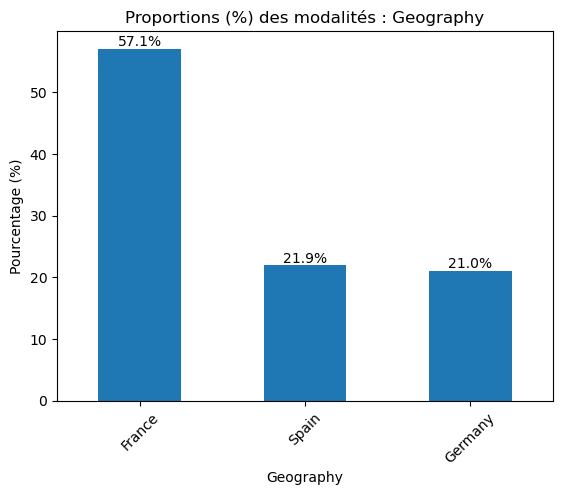

VARIABLE CATÉGORIELLE : Gender
        Effectif  Pourcentage (%)
Gender                           
Male       74478             56.4
Female     57549             43.6


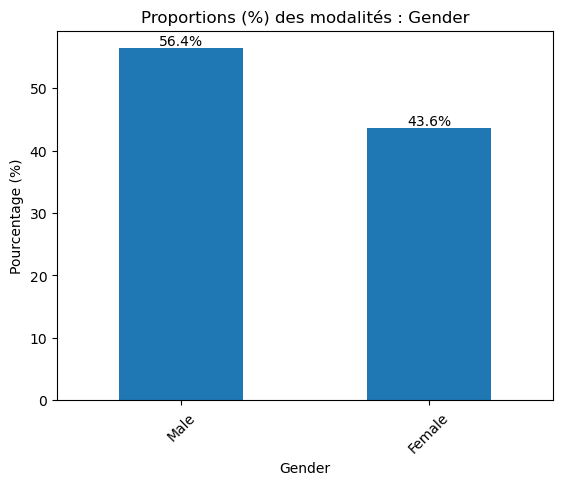

In [120]:

for var in categorical_cols:
    print("="*70)
    print(f"VARIABLE CATÉGORIELLE : {var}")
    
    # -------------------
    # 1 Fréquences
    # -------------------
    counts = X_train[var].value_counts(dropna=False)
    proportions = X_train[var].value_counts(normalize=True, dropna=False) * 100
    
    summary = pd.DataFrame({
        'Effectif': counts,
        'Pourcentage (%)': proportions.round(1)
    })
    
    print(summary)
    
    # -------------------
    # 2 Visualisation — effectifs
    # -------------------
    #ax = counts.plot(kind='bar')
    #ax.set_title(f"Effectifs des modalités : {var}")
    #ax.set_ylabel("Effectif")
    #ax.set_xlabel(var)
    #plt.xticks(rotation=45)
    
    # Ajouter les étiquettes
    #for container in ax.containers:
    #    ax.bar_label(container, label_type="edge")
    
    #plt.show()
    
    # -------------------
    # 3 Visualisation — proportions
    # -------------------
    ax = proportions.plot(kind='bar')
    ax.set_title(f"Proportions (%) des modalités : {var}")
    ax.set_ylabel("Pourcentage (%)")
    ax.set_xlabel(var)
    plt.xticks(rotation=45)
    
    # Ajouter les étiquettes
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge")
    
    plt.show()
    
    # -------------------
    # 4 Détection de déséquilibres
    # -------------------
    if proportions.max() > 80:
        print("\nForte dominance d’une modalité (> 80%)")
    
    if (proportions < 5).any():
        print("Modalités rares détectées (< 5%)")
    
    # -------------------
    # 5 Implication ML
    # -------------------
    #print("Implication : réflexion nécessaire sur l’encodage, les biais éventuels et le choix des métriques.\n")

ANALYSE BIVARIEE

ANALYSE BIVARIÉE : CREDITSCORE ↔ Exited


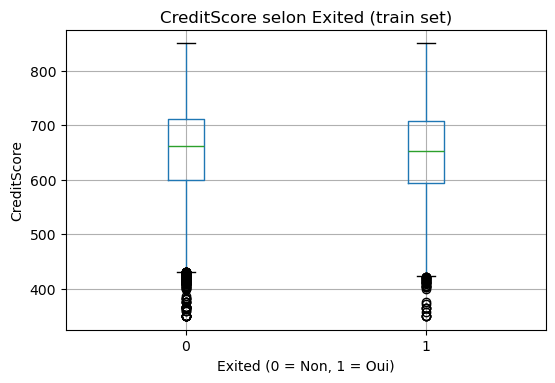

Test de Mann–Whitney U :
  → Statistique U = 1512984901.0
  → p-value = 0.00000
 Différence statistiquement SIGNIFICATIVE entre les groupes
Médiane (Exited = 0) : 662.00
Médiane (Exited = 1) : 652.00
Interprétation : la variable CreditScore est plus faible chez les clients qui quittent
ANALYSE BIVARIÉE : AGE ↔ Exited


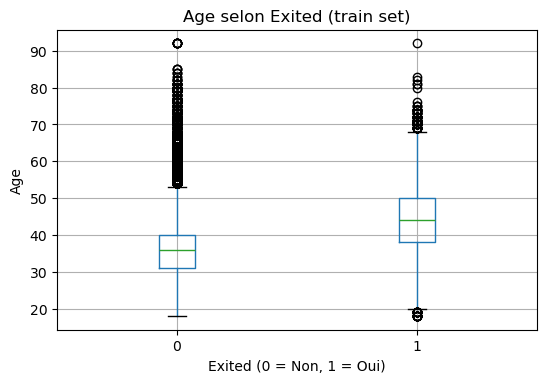

Test de Mann–Whitney U :
  → Statistique U = 725708712.0
  → p-value = 0.00000
 Différence statistiquement SIGNIFICATIVE entre les groupes
Médiane (Exited = 0) : 36.00
Médiane (Exited = 1) : 44.00
Interprétation : la variable Age est plus élevée chez les clients qui quittent
ANALYSE BIVARIÉE : TENURE ↔ Exited


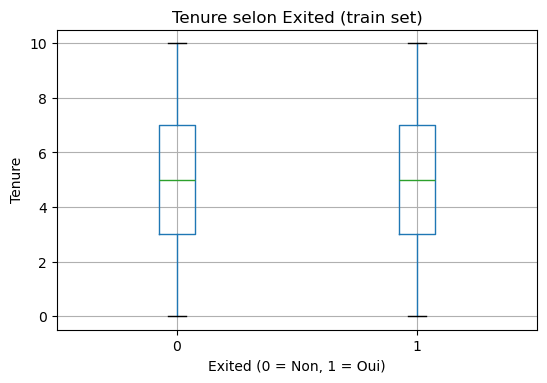

Test de Mann–Whitney U :
  → Statistique U = 1495309643.5
  → p-value = 0.00000
 Différence statistiquement SIGNIFICATIVE entre les groupes
Médiane (Exited = 0) : 5.00
Médiane (Exited = 1) : 5.00
Les médianes sont égales (5.00). Tendance centrale similaire, mais il faut examiner la dispersion.
ANALYSE BIVARIÉE : BALANCE ↔ Exited


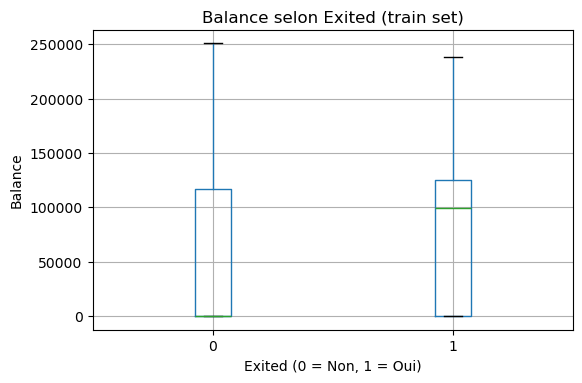

Test de Mann–Whitney U :
  → Statistique U = 1217592066.5
  → p-value = 0.00000
 Différence statistiquement SIGNIFICATIVE entre les groupes
Médiane (Exited = 0) : 0.00
Médiane (Exited = 1) : 99102.32
Interprétation : la variable Balance est plus élevée chez les clients qui quittent
ANALYSE BIVARIÉE : NUMOFPRODUCTS ↔ Exited


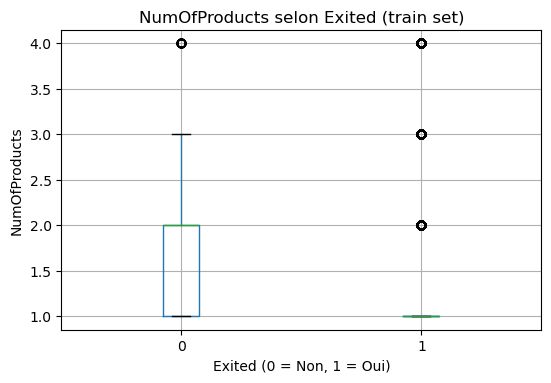

Test de Mann–Whitney U :
  → Statistique U = 1934163475.0
  → p-value = 0.00000
 Différence statistiquement SIGNIFICATIVE entre les groupes
Médiane (Exited = 0) : 2.00
Médiane (Exited = 1) : 1.00
Interprétation : la variable NumOfProducts est plus faible chez les clients qui quittent
ANALYSE BIVARIÉE : HASCRCARD ↔ Exited


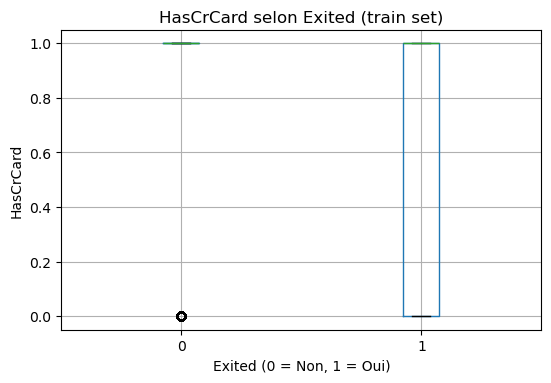

Test de Mann–Whitney U :
  → Statistique U = 1488807295.5
  → p-value = 0.00000
 Différence statistiquement SIGNIFICATIVE entre les groupes
Médiane (Exited = 0) : 1.00
Médiane (Exited = 1) : 1.00
Les médianes sont égales (1.00). Tendance centrale similaire, mais il faut examiner la dispersion.
ANALYSE BIVARIÉE : ISACTIVEMEMBER ↔ Exited


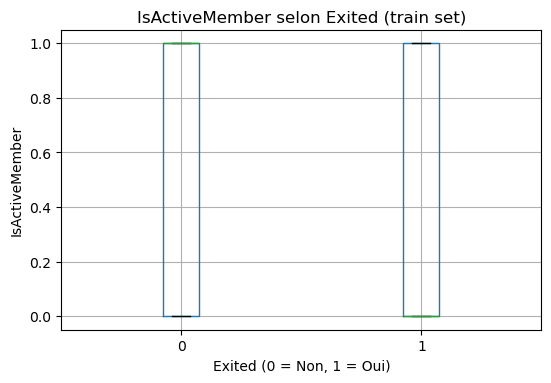

Test de Mann–Whitney U :
  → Statistique U = 1829743662.0
  → p-value = 0.00000
 Différence statistiquement SIGNIFICATIVE entre les groupes
Médiane (Exited = 0) : 1.00
Médiane (Exited = 1) : 0.00
Interprétation : la variable IsActiveMember est plus faible chez les clients qui quittent
ANALYSE BIVARIÉE : ESTIMATEDSALARY ↔ Exited


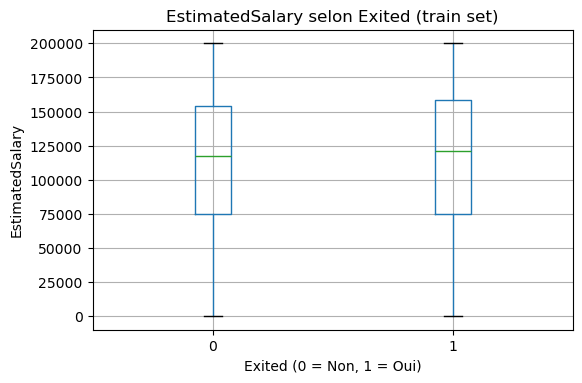

Test de Mann–Whitney U :
  → Statistique U = 1416447086.5
  → p-value = 0.00000
 Différence statistiquement SIGNIFICATIVE entre les groupes
Médiane (Exited = 0) : 117031.20
Médiane (Exited = 1) : 120892.96
Interprétation : la variable EstimatedSalary est plus élevée chez les clients qui quittent


In [121]:
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt

for var in numeric_cols:
    print("="*80)
    print(f"ANALYSE BIVARIÉE : {var.upper()} ↔ Exited")
    
    # Séparation des groupes sur X_train et y_train
    group_no = X_train.loc[y_train == 0, var].dropna()
    group_yes = X_train.loc[y_train == 1, var].dropna()
    
    # 1. VISUALISATION
    temp_df = X_train.copy()
    temp_df["Exited"] = y_train.values
    temp_df.boxplot(column=var, by="Exited", figsize=(6,4))
    plt.title(f"{var} selon Exited (train set)")
    plt.suptitle("")
    plt.xlabel("Exited (0 = Non, 1 = Oui)")
    plt.ylabel(var)
    plt.show()
    
    # 2. TEST STATISTIQUE
    stat, p_value = mannwhitneyu(group_no, group_yes, alternative='two-sided')
    print("Test de Mann–Whitney U :")
    print(f"  → Statistique U = {stat}")
    print(f"  → p-value = {p_value:.5f}")
    
    # 3. INTERPRÉTATION AUTOMATIQUE
    if p_value < 0.05:
        print(" Différence statistiquement SIGNIFICATIVE entre les groupes")
    else:
        print(" Aucune différence statistiquement significative détectée")
    
    # 4. INTERPRÉTATION MÉTIER
    median_no = group_no.median()
    median_yes = group_yes.median()
    
    print(f"Médiane (Exited = 0) : {median_no:.2f}")
    print(f"Médiane (Exited = 1) : {median_yes:.2f}")
    
    if median_yes > median_no:
        print(f"Interprétation : la variable {var} est plus élevée chez les clients qui quittent")
    elif median_yes == median_no:
        print(f"Les médianes sont égales ({median_no:.2f}). Tendance centrale similaire, mais il faut examiner la dispersion.")
    else:
        print(f"Interprétation : la variable {var} est plus faible chez les clients qui quittent")

TARGET ET NUMERIC

CREDITSCORE ↔ EXITED (train set)


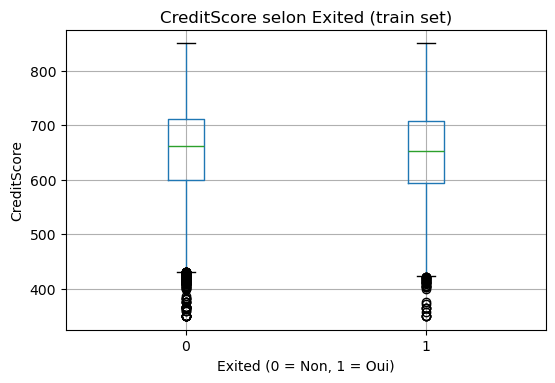

p-value (Mann–Whitney) : 0.00000 → significatif
Cliff’s delta          : -0.040
Taille d’effet         : négligeable
Médiane (Exited = 0)   : 662.00
Médiane (Exited = 1)   : 652.00
→ Les clients restants (Exited=0) ont en général des valeurs plus élevées de CreditScore.
Rappel : significativité ≠ importance pratique, et association ≠ causalité.

AGE ↔ EXITED (train set)


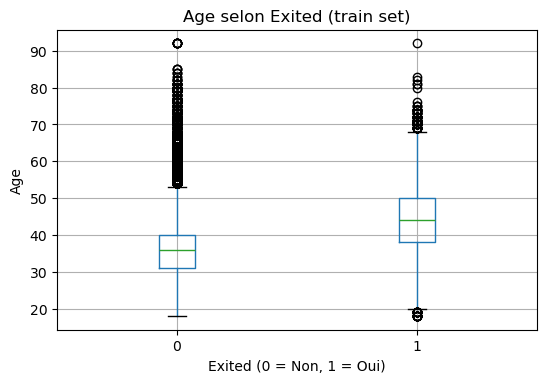

p-value (Mann–Whitney) : 0.00000 → significatif
Cliff’s delta          : 0.501
Taille d’effet         : fort
Médiane (Exited = 0)   : 36.00
Médiane (Exited = 1)   : 44.00
→ Les clients sortants (Exited=1) ont en général des valeurs plus élevées de Age.
Rappel : significativité ≠ importance pratique, et association ≠ causalité.

TENURE ↔ EXITED (train set)


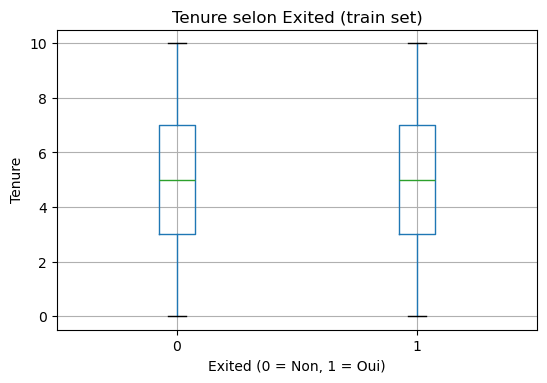

p-value (Mann–Whitney) : 0.00000 → significatif
Cliff’s delta          : -0.028
Taille d’effet         : négligeable
Médiane (Exited = 0)   : 5.00
Médiane (Exited = 1)   : 5.00
→ Les clients restants (Exited=0) ont en général des valeurs plus élevées de Tenure.
Rappel : significativité ≠ importance pratique, et association ≠ causalité.

BALANCE ↔ EXITED (train set)


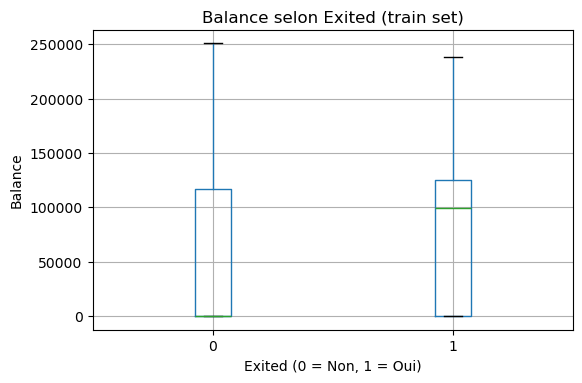

p-value (Mann–Whitney) : 0.00000 → significatif
Cliff’s delta          : 0.163
Taille d’effet         : faible
Médiane (Exited = 0)   : 0.00
Médiane (Exited = 1)   : 99102.32
→ Les clients sortants (Exited=1) ont en général des valeurs plus élevées de Balance.
Rappel : significativité ≠ importance pratique, et association ≠ causalité.

NUMOFPRODUCTS ↔ EXITED (train set)


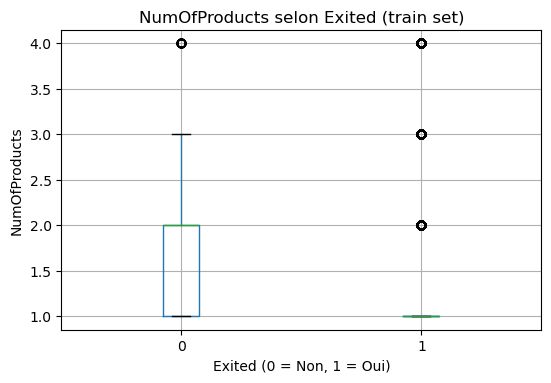

p-value (Mann–Whitney) : 0.00000 → significatif
Cliff’s delta          : -0.329
Taille d’effet         : faible
Médiane (Exited = 0)   : 2.00
Médiane (Exited = 1)   : 1.00
→ Les clients restants (Exited=0) ont en général des valeurs plus élevées de NumOfProducts.
Rappel : significativité ≠ importance pratique, et association ≠ causalité.

HASCRCARD ↔ EXITED (train set)


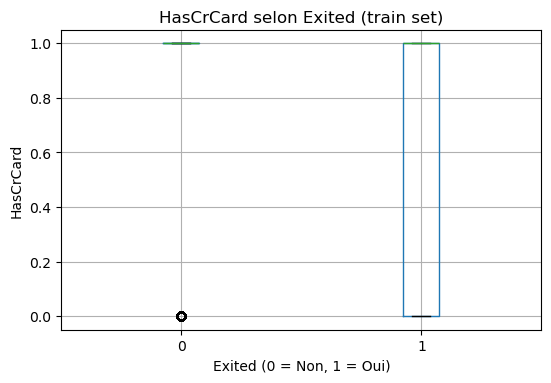

p-value (Mann–Whitney) : 0.00000 → significatif
Cliff’s delta          : -0.023
Taille d’effet         : négligeable
Médiane (Exited = 0)   : 1.00
Médiane (Exited = 1)   : 1.00
→ Les clients restants (Exited=0) ont en général des valeurs plus élevées de HasCrCard.
Rappel : significativité ≠ importance pratique, et association ≠ causalité.

ISACTIVEMEMBER ↔ EXITED (train set)


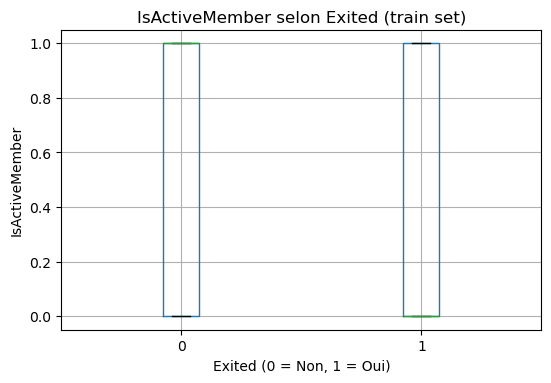

p-value (Mann–Whitney) : 0.00000 → significatif
Cliff’s delta          : -0.257
Taille d’effet         : faible
Médiane (Exited = 0)   : 1.00
Médiane (Exited = 1)   : 0.00
→ Les clients restants (Exited=0) ont en général des valeurs plus élevées de IsActiveMember.
Rappel : significativité ≠ importance pratique, et association ≠ causalité.

ESTIMATEDSALARY ↔ EXITED (train set)


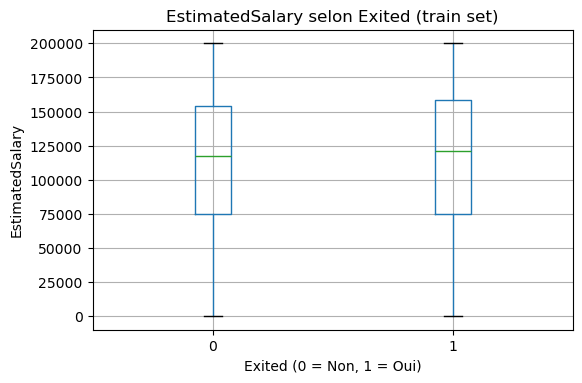

p-value (Mann–Whitney) : 0.00000 → significatif
Cliff’s delta          : 0.027
Taille d’effet         : négligeable
Médiane (Exited = 0)   : 117031.20
Médiane (Exited = 1)   : 120892.96
→ Les clients sortants (Exited=1) ont en général des valeurs plus élevées de EstimatedSalary.
Rappel : significativité ≠ importance pratique, et association ≠ causalité.



In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, rankdata

# --------------------------------------------------
# Cliff's Delta (rapide)
# --------------------------------------------------
def cliffs_delta_fast(x, y):
    x = np.asarray(x)
    y = np.asarray(y)
    nx = len(x)
    ny = len(y)

    if nx == 0 or ny == 0:
        return np.nan

    ranks = rankdata(np.concatenate([x, y]))
    rx = np.sum(ranks[:nx])

    return (2 * rx - nx * (nx + 1)) / (nx * ny) - 1

# --------------------------------------------------
# Analyse bivariée sur TRAIN SET
# --------------------------------------------------
alpha = 0.05

for var in numeric_cols:
    print("=" * 80)
    print(f"{var.upper()} ↔ EXITED (train set)")

    # Groupes sur X_train et y_train
    group_0 = X_train.loc[y_train == 0, var].dropna()
    group_1 = X_train.loc[y_train == 1, var].dropna()

    # 1. VISUALISATION
    temp_df = X_train.copy()
    temp_df["Exited"] = y_train.values
    temp_df.boxplot(column=var, by="Exited", figsize=(6,4))
    plt.title(f"{var} selon Exited (train set)")
    plt.suptitle("")
    plt.xlabel("Exited (0 = Non, 1 = Oui)")
    plt.ylabel(var)
    plt.show()

    # 2. TEST STATISTIQUE
    stat, p_value = mannwhitneyu(group_0, group_1, alternative="two-sided")

    # 3. Taille d’effet (Cliff’s delta)
    delta = cliffs_delta_fast(group_1, group_0)
    abs_delta = abs(delta)

    if abs_delta < 0.147:
        effect = "négligeable"
    elif abs_delta < 0.33:
        effect = "faible"
    elif abs_delta < 0.474:
        effect = "modéré"
    else:
        effect = "fort"

    # 4. Médianes
    median_0 = group_0.median()
    median_1 = group_1.median()

    # 5. Significativité
    significance = "significatif" if p_value < alpha else "non significatif"

    # --------------------------------------------------
    # Affichage
    # --------------------------------------------------
    print(f"p-value (Mann–Whitney) : {p_value:.5f} → {significance}")
    print(f"Cliff’s delta          : {delta:.3f}")
    print(f"Taille d’effet         : {effect}")
    print(f"Médiane (Exited = 0)   : {median_0:.2f}")
    print(f"Médiane (Exited = 1)   : {median_1:.2f}")

    if delta > 0:
        print(f"→ Les clients sortants (Exited=1) ont en général des valeurs plus élevées de {var}.")
    elif delta < 0:
        print(f"→ Les clients restants (Exited=0) ont en général des valeurs plus élevées de {var}.")
    else:
        print(f"→ Pas de différence notable pour {var}.")

    print("Rappel : significativité ≠ importance pratique, et association ≠ causalité.\n")

import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu

# --------------------------------------------------
# Cliff's Delta (version efficace)
# --------------------------------------------------
def cliffs_delta(x, y):
    x = np.asarray(x)
    y = np.asarray(y)
    nx = len(x)
    ny = len(y)

    # Gestion des cas limites
    if nx == 0 or ny == 0:
        return np.nan

    greater = np.sum(x[:, None] > y)
    lower   = np.sum(x[:, None] < y)

    return (greater - lower) / (nx * ny)


# --------------------------------------------------
# Analyse bivariée : variables numériques vs Exited
# --------------------------------------------------
alpha = 0.05

for var in numeric_cols:
    print("=" * 80)
    print(f"{var.upper()} ↔ EXITED")

    # Groupes
    group_0 = train_data.loc[train_data["Exited"] == 0, var].dropna()
    group_1 = train_data.loc[train_data["Exited"] == 1, var].dropna()

    # Test de Mann–Whitney
    stat, p_value = mannwhitneyu(
        group_0,
        group_1,
        alternative="two-sided"
    )

    # Taille d'effet
    delta = cliffs_delta(group_1, group_0)
    abs_delta = abs(delta)

    # Interprétation taille d'effet
    if abs_delta < 0.147:
        effect = "négligeable"
    elif abs_delta < 0.33:
        effect = "faible"
    elif abs_delta < 0.474:
        effect = "modéré"
    else:
        effect = "fort"

    # Médianes
    median_0 = group_0.median()
    median_1 = group_1.median()

    # Significativité
    significance = "significatif" if p_value < alpha else "non significatif"

    # --------------------------------------------------
    # Affichage
    # --------------------------------------------------
    print(f"p-value (Mann–Whitney) : {p_value:.5f} → {significance}")
    print(f"Cliff’s delta          : {delta:.3f}")
    print(f"Taille d’effet         : {effect}")
    print(f"Médiane (Exited = 0)   : {median_0:.2f}")
    print(f"Médiane (Exited = 1)   : {median_1:.2f}")

    if delta > 0:
        print(f"→ Les clients sortants ont en général des valeurs plus élevées de {var}.")
    elif delta < 0:
        print(f"→ Les clients restants ont en général des valeurs plus élevées de {var}.")
    else:
        print(f"→ Pas de différence notable pour {var}.")

    print("Rappel : significativité ≠ importance pratique, et association ≠ causalité.\n")

TARGET ET CATEGORIELLES

ANALYSE BIVARIÉE : Geography ↔ Exited (train set)

Tableau croisé :
Exited         0      1
Geography              
France     62873  12478
Germany    17227  10514
Spain      23961   4974


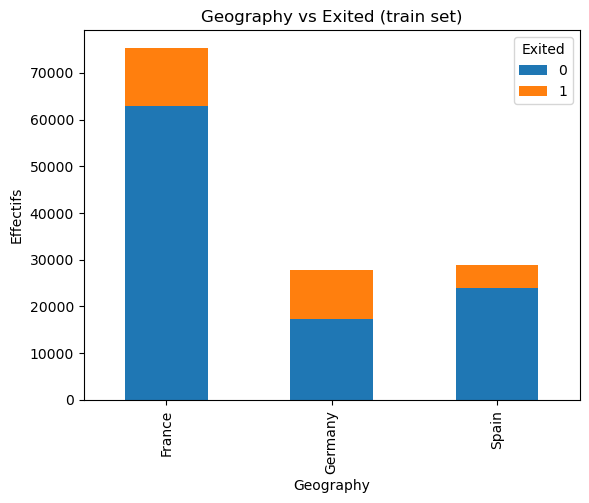

Test Chi-deux : p-value = 0.00000
 Association statistiquement significative détectée
Rappel : prudence, pas de causalité

ANALYSE BIVARIÉE : Gender ↔ Exited (train set)

Tableau croisé :
Exited      0      1
Gender              
Female  41452  16097
Male    62609  11869


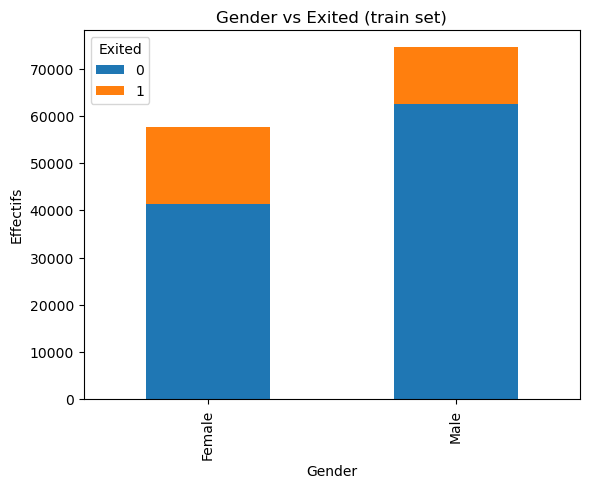

Test Chi-deux : p-value = 0.00000
 Association statistiquement significative détectée
Rappel : prudence, pas de causalité



In [123]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

for var in categorical_cols:
    print("="*70)
    print(f"ANALYSE BIVARIÉE : {var} ↔ Exited (train set)")

    # -------------------
    # 1. TABLEAU CROISÉ
    # -------------------
    temp_df = X_train.copy()
    temp_df["Exited"] = y_train.values
    table = pd.crosstab(temp_df[var], temp_df["Exited"])
    print("\nTableau croisé :")
    print(table)

    # -------------------
    # 2. VISUALISATION
    # -------------------
    table.plot(kind='bar', stacked=True)
    plt.ylabel("Effectifs")
    plt.title(f"{var} vs Exited (train set)")
    plt.show()

    # -------------------
    # 3. TEST DU CHI-DEUX
    # -------------------
    chi2, p, dof, expected = chi2_contingency(table)
    print(f"Test Chi-deux : p-value = {p:.5f}")

    # Vérification des effectifs attendus
    if (expected < 5).any():
        print(" Attention : effectifs attendus faibles (test fragile)")

    # -------------------
    # 4. INTERPRÉTATION AUTOMATIQUE
    # -------------------
    if p < 0.05:
        print(" Association statistiquement significative détectée")
    else:
        print(" Aucune association statistiquement significative détectée")

    print("Rappel : prudence, pas de causalité\n")

GEOGRAPHY ↔ Exited (train set)

Tableau croisé :
Exited         0      1
Geography              
France     62873  12478
Germany    17227  10514
Spain      23961   4974


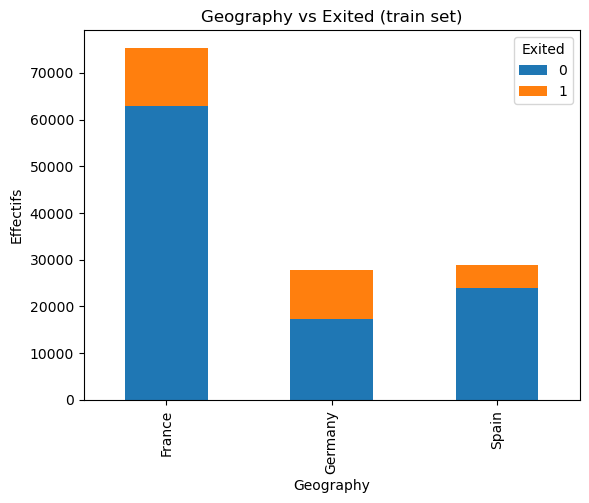

p-value (Chi-deux) : 0.00000
Cramér’s V         : 0.211
 Association statistiquement significative détectée
Taille d’effet : faible

GENDER ↔ Exited (train set)

Tableau croisé :
Exited      0      1
Gender              
Female  41452  16097
Male    62609  11869


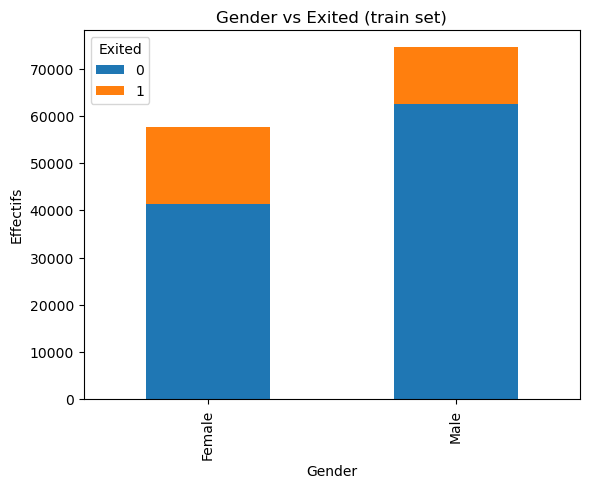

p-value (Chi-deux) : 0.00000
Cramér’s V         : 0.146
 Association statistiquement significative détectée
Taille d’effet : faible



In [124]:
from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------------------------
# Fonction Cramér’s V
# --------------------------------------------------
def cramers_v(table):
    chi2, _, _, _ = chi2_contingency(table)
    n = table.sum().sum()
    r, k = table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# --------------------------------------------------
# Analyse bivariée sur TRAIN SET
# --------------------------------------------------
for var in categorical_cols:  
    print("="*80)
    print(f"{var.upper()} ↔ Exited (train set)")
    
    # Table de contingence sur X_train + y_train
    temp_df = X_train.copy()
    temp_df["Exited"] = y_train.values
    table = pd.crosstab(temp_df[var], temp_df["Exited"])
    
    print("\nTableau croisé :")
    print(table)
    
    # Visualisation
    table.plot(kind='bar', stacked=True)
    plt.ylabel("Effectifs")
    plt.title(f"{var} vs Exited (train set)")
    plt.show()
    
    # Test du Chi-deux
    chi2, p, _, expected = chi2_contingency(table)
    v = cramers_v(table)
    
    print(f"p-value (Chi-deux) : {p:.5f}")
    print(f"Cramér’s V         : {v:.3f}")
    
    if (expected < 5).any():
        print(" Attention : effectifs attendus faibles (test fragile)")
    
    # Interprétation automatique
    if p < 0.05:
        print(" Association statistiquement significative détectée")
    else:
        print(" Aucune association statistiquement significative détectée")
    
    # Intensité de l’association
    if v < 0.1:
        eff = "négligeable"
    elif v < 0.3:
        eff = "faible"
    elif v < 0.5:
        eff = "modéré"
    else:
        eff = "fort"
    
    print(f"Taille d’effet : {eff}\n")

Cette analyse exploratoire a permis d’identifier Age comme le principal facteur associé au départ des clients.
Les variables Balance, IsActiveMember et NumOfProducts jouent un rôle secondaire mais significatif, tandis que Geography et Gender apportent une information complémentaire.
Certaines variables numériques n’ont montré :
•	aucune différence statistiquement significative
•	ou une taille d’effet négligeable
Parmi elles :
•	Tenure
•	HasCrCard
•	EstimatedSalary
+++++Leur contribution individuelle au churn est faible.
Elles pourront néanmoins être conservées en modélisation afin de capter d’éventuelles interactions non linéaires.


ENCODANCE DE GENDER ET GEOGRAPHY

France     1
Germany    2
Spain      3

#import pandas as pd

# Encodage binaire pour Gender
X_train["Gender"] = X_train["Gender"].map({"Female": 0, "Male": 1})
X_test["Gender"] = X_test["Gender"].map({"Female": 0, "Male": 1})

# Encodage one-hot pour Geography
X_train = pd.get_dummies(X_train, columns=["Geography"], drop_first=True)
X_test = pd.get_dummies(X_test, columns=["Geography"], drop_first=True)

import pandas as pd

# Encodage uniquement de Gender et Geography
train_data = pd.get_dummies(train_data, columns=["Gender", "Geography"], drop_first=True)

print(train_data.head())

MODELISATION

In [125]:
import pandas as pd

# 1. Encodage binaire pour Gender
X_train["Gender"] = X_train["Gender"].map({"Female": 0, "Male": 1})
X_test["Gender"] = X_test["Gender"].map({"Female": 0, "Male": 1})

# 2. Encodage one-hot pour Geography
X_train = pd.get_dummies(X_train, columns=["Geography"], drop_first=True)
X_test = pd.get_dummies(X_test, columns=["Geography"], drop_first=True)

# 3. Alignement des colonnes entre train et test
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Vérification
print("Colonnes X_train :", X_train.columns)
print("Colonnes X_test  :", X_test.columns)

Colonnes X_train : Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Gender', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')
Colonnes X_test  : Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Gender', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=100,class_
learning_rate=0.1,
max_depth=3,
random_state=42)

In [127]:

# 4. Entraînement
gb.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [128]:
# Prédictions
y_pred_train = gb.predict(X_train)
y_pred_test = gb.predict(X_test)

In [129]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, roc_auc_score, confusion_matrix,f1_score,classification_report

# Évaluation sur train
#print("Train Accuracy :", accuracy_score(y_train, y_pred_train))

# Évaluation sur test
print("Test Accuracy :", accuracy_score(y_test, y_pred_test))
print("Precision :", precision_score(y_test, y_pred_test))
print("Recall :", recall_score(y_test, y_pred_test))
print("F1 Score :", f1_score(y_test, y_pred_test))
print("ROC AUC :", roc_auc_score(y_test, y_pred_test))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred_test))
#print("Classification Report :\n", classification_report(y_test, y_pred_test))


Test Accuracy : 0.8662707910443239
Precision : 0.7514347912131407
Recall : 0.5459381739755571
F1 Score : 0.6324117255163224
ROC AUC : 0.7488634521037005
Confusion Matrix :
 [[24796  1256]
 [ 3158  3797]]


In [130]:
from sklearn.metrics import classification_report

print("TRAIN")
print(classification_report(y_train, y_pred_train))

print("TEST")
print(classification_report(y_test, y_pred_test))

TRAIN
              precision    recall  f1-score   support

           0       0.89      0.95      0.92    104061
           1       0.75      0.54      0.63     27966

    accuracy                           0.86    132027
   macro avg       0.82      0.75      0.77    132027
weighted avg       0.86      0.86      0.86    132027

TEST
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26052
           1       0.75      0.55      0.63      6955

    accuracy                           0.87     33007
   macro avg       0.82      0.75      0.78     33007
weighted avg       0.86      0.87      0.86     33007



equilibrage avec smote

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

# 2. Application de SMOTE sur le train set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Avant SMOTE :", y_train.value_counts())
print("Après SMOTE :", y_train_resampled.value_counts())

# 3. Entraînement du Gradient Boosting
gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb.fit(X_train_resampled, y_train_resampled)

# 4. Évaluation
y_pred_train = gb.predict(X_train_resampled)
y_pred_test = gb.predict(X_test)

from sklearn.metrics import classification_report
print("TRAIN\n", classification_report(y_train_resampled, y_pred_train))
print("TEST\n", classification_report(y_test, y_pred_test))

Avant SMOTE : Exited
0    104061
1     27966
Name: count, dtype: int64
Après SMOTE : Exited
0    104061
1    104061
Name: count, dtype: int64
TRAIN
               precision    recall  f1-score   support

           0       0.88      0.91      0.89    104061
           1       0.90      0.87      0.89    104061

    accuracy                           0.89    208122
   macro avg       0.89      0.89      0.89    208122
weighted avg       0.89      0.89      0.89    208122

TEST
               precision    recall  f1-score   support

           0       0.91      0.90      0.91     26052
           1       0.65      0.67      0.66      6955

    accuracy                           0.85     33007
   macro avg       0.78      0.79      0.78     33007
weighted avg       0.86      0.85      0.85     33007



DECISIONTREECLASSIFIER

In [132]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, roc_auc_score, confusion_matrix,f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import AdaBoostClassifier
base_df1= DecisionTreeClassifier()
ada_b=AdaBoostClassifier(
    estimator=base_df1,
    n_estimators=100,
    random_state=42
)

In [133]:
ada_b.fit(X_train,y_train)

,estimator,DecisionTreeClassifier()
,n_estimators,100
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [134]:
y_pred_ad_train=ada_b.predict(X_train)
y_pred_ad_test=ada_b.predict(X_test)

In [135]:
# Évaluation
print("Accuracy :", accuracy_score(y_test, y_pred_test))
print("Precision :", precision_score(y_test, y_pred_test))
print("Recall :", recall_score(y_test, y_pred_test))
print("F1 Score :", f1_score(y_test, y_pred_test))
print("ROC AUC :", roc_auc_score(y_test, y_pred_test))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred_test))
#print("Classification Report :\n", classification_report(y_test, y_pred_test))


Accuracy : 0.8537885902990274
Precision : 0.6476626439173255
Recall : 0.6713156002875629
F1 Score : 0.6592770403840723
ROC AUC : 0.7869091436106938
Confusion Matrix :
 [[23512  2540]
 [ 2286  4669]]


In [136]:
from sklearn.metrics import classification_report

print("TRAIN")
print(classification_report(y_train, y_pred_ad_train))

print("TEST")
print(classification_report(y_test, y_pred_ad_test))

TRAIN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    104061
           1       1.00      1.00      1.00     27966

    accuracy                           1.00    132027
   macro avg       1.00      1.00      1.00    132027
weighted avg       1.00      1.00      1.00    132027

TEST
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     26052
           1       0.60      0.55      0.57      6955

    accuracy                           0.83     33007
   macro avg       0.74      0.72      0.73     33007
weighted avg       0.82      0.83      0.82     33007



Optimiser les hyperparamètres

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Grille de recherche
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.5, 1.0],
    "estimator__max_depth": [1, 2, 3, 5]  # profondeur de l'arbre de base
}

# Base estimator (arbre de décision simple)
base_df1 = DecisionTreeClassifier(random_state=42)

# AdaBoost avec arbre comme base
ada_b = AdaBoostClassifier(estimator=base_df1, random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    ada_b,
    param_grid,
    cv=3,
    scoring="f1",
    n_jobs=-1  # parallélisation pour accélérer
)

# Entraînement
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleur score F1 :", grid_search.best_score_)

RandomForestClassifier

In [147]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight="balanced",
    random_state=42
)
rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [150]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Prédictions
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Évaluation sur train
print("Train Accuracy :", accuracy_score(y_train, y_pred_train))

# Évaluation sur test
print("Test Accuracy :", accuracy_score(y_test, y_pred_test))
print("Precision :", precision_score(y_test, y_pred_test))
print("Recall :", recall_score(y_test, y_pred_test))
print("F1 Score :", f1_score(y_test, y_pred_test))
print("ROC AUC :", roc_auc_score(y_test, y_pred_test))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred_test))
#print("Classification Report :\n", classification_report(y_test, y_pred_test))

Train Accuracy : 0.8279745809569254
Test Accuracy : 0.815493683158118
Precision : 0.543107744443337
Recall : 0.7834651329978433
F1 Score : 0.6415116552860843
ROC AUC : 0.8037546761258217
Confusion Matrix :
 [[21468  4584]
 [ 1506  5449]]


In [151]:
from sklearn.metrics import classification_report

print("TRAIN")
print(classification_report(y_train, y_pred_ad_train))

print("TEST")
print(classification_report(y_test, y_pred_ad_test))

TRAIN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    104061
           1       1.00      1.00      1.00     27966

    accuracy                           1.00    132027
   macro avg       1.00      1.00      1.00    132027
weighted avg       1.00      1.00      1.00    132027

TEST
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     26052
           1       0.60      0.55      0.57      6955

    accuracy                           0.83     33007
   macro avg       0.74      0.72      0.73     33007
weighted avg       0.82      0.83      0.82     33007



In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 1. Bagging
bagging = BaggingClassifier(n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bag))

# 2. Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# 3. Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

# 4. SVM
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# Rapport détaillé pour SVM
print("\nClassification Report (SVM):\n", classification_report(y_test, y_pred_svm))

Bagging Accuracy: 0.8548186748265519
Random Forest Accuracy: 0.8660890114218196
Gradient Boosting Accuracy: 0.8682400702881207


XGBClassifier